## Exploratory Data Analysis and Application of Tensorflow for Predictive Modeling of Properties

In [41]:
%run ./'Basic_Import.ipynb'
# Imports the following libraries:
# import pandas as pd, numpy as np, matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.style()
# import seaborn as sns
# from sklearn.model_selection import train_test_split as tts
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import confusion_matrix
# plt.subplots(figsize=(16,10))
# %matplotlib inline

# import sys
# !{sys.executable} -m pip install tensorflow

In [56]:
# Read in the Kaggle Housing Data using Pandas; the dataset contains information in regards to the available property in King's county, Washington
df = pd.read_csv('//Users/morgan/Downloads/TF_2_Notebooks_and_Data/data/kc_house_data.csv')

In [7]:
# Parse dataset to look for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Use describe function to further observe the data, with statistical insight of each variable
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


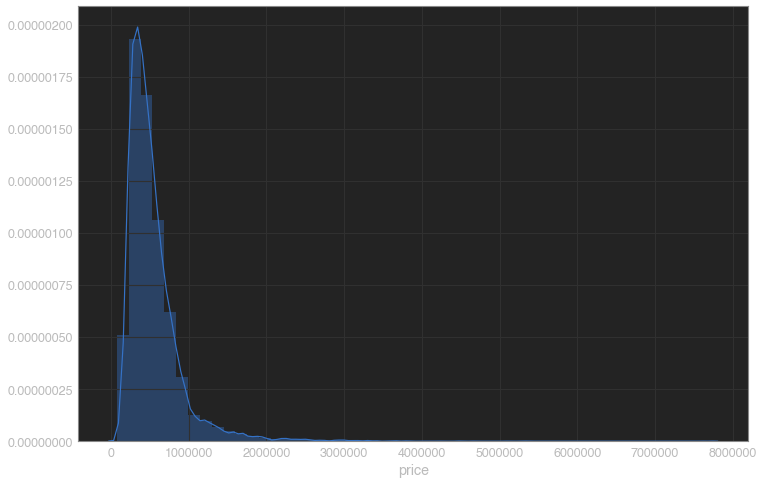

In [10]:
# Plot the Price column of the dataset using Seaborn
plt.figure(figsize=(12,8))
sns.distplot(df['price'])
# We observe that most of the houses are within $0 and $2,000,000, with outliers present until a max of $8,000,000.

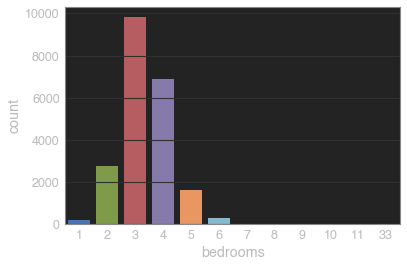

In [11]:
# Utilize a count plot to quickly observe the distribution of bedrooms across the available properties
sns.countplot(df['bedrooms'])

In [12]:
# Create a correlation table to observe the relationship among the variables with price
df.corr()['price'].sort_values()
# We see that the SQ footage of the property is closely correlated with the price, followed by grade and number of bathrooms. 

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

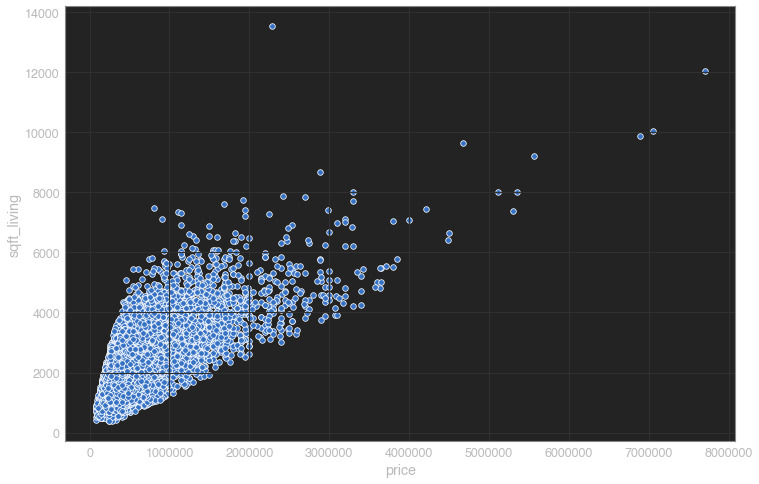

In [13]:
# We then create a scatter plot of the price and sqft_libing columns to visualize the distribution
plt.figure(figsize=(12.,8))
sns.scatterplot(x='price', y='sqft_living', data=df)

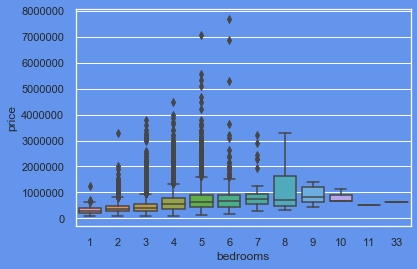

In [16]:
# Create a box plot to visualize the correlation of the bedrooms and price columns
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.boxplot(x='bedrooms', y='price', data=df)

## Geographical Properties

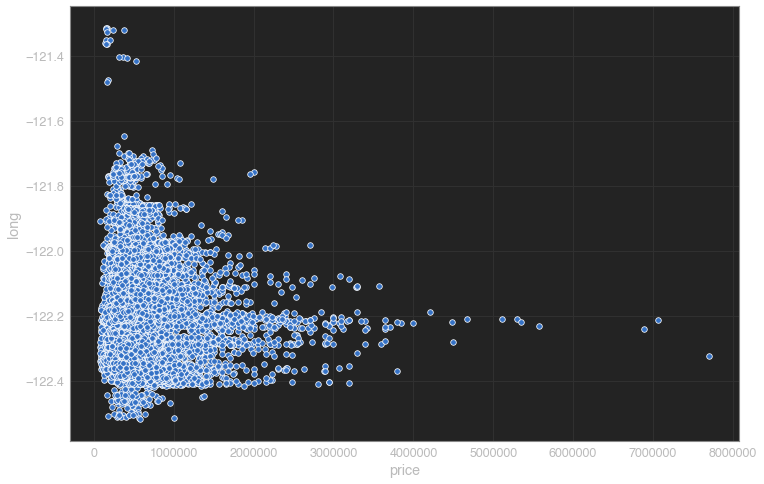

In [18]:
# Create a scatter plot to visualize the relationship between price and longitude
%run ./'Basic_Import.ipynb'
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)
# We see an accumulation of high-priced on the -122.2 longitudinal value

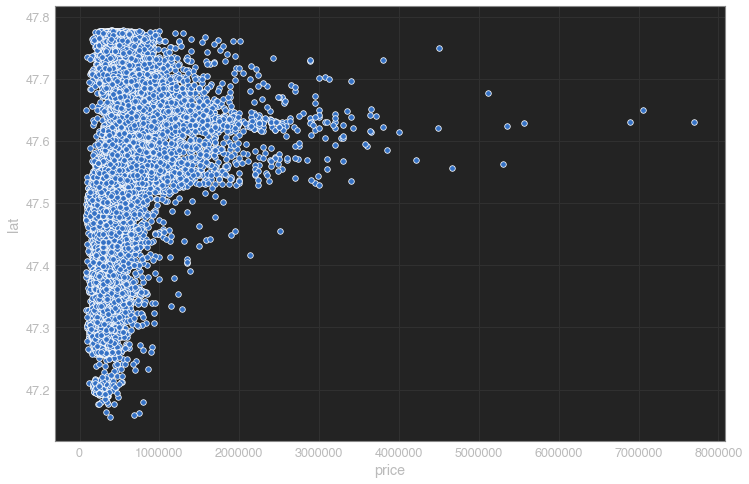

In [19]:
# Repeat the correlation for latitdude.
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)
# We see a similar accumulation of high-priced properties along the 47.62 latitudinal value.

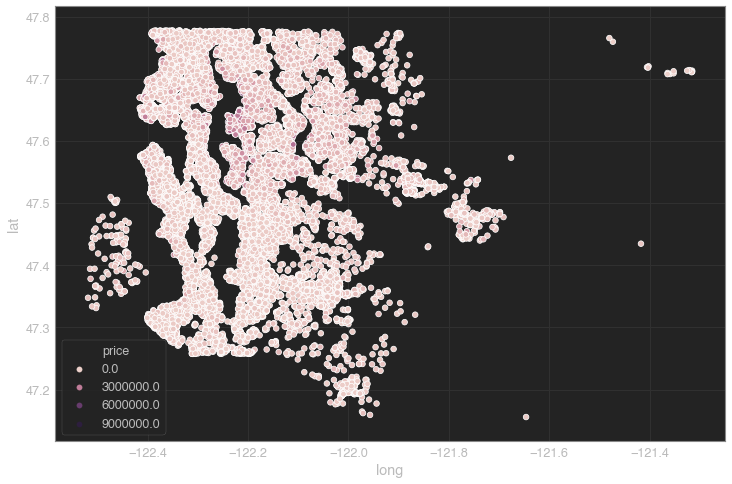

In [20]:
# We now map the results using a scatterplot, which results roughly into an image of King's county 
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [21]:
# Sort the price column of the dataset in descneding order to observe the outliers
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [24]:
# Find 1% of the number of rows
len(df)*(0.01)

215.97

In [25]:
# Now we eliminate the top 1% of price data due to being outliers
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:]

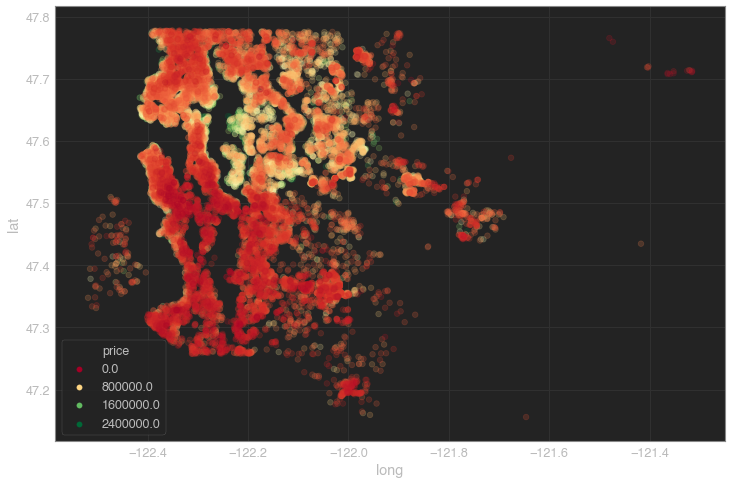

In [27]:
# Create a heatmap of the data points with respect to their price
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_percent,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

## Scaling and Modeling

In [57]:
# df['date'] = pd.to_datetime(df['date'])
df = df.drop('date',axis=1)
X = df.drop('price', axis=1).values
y = df['price'].values

In [58]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=101)

In [59]:
# Redefine our training set by scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(15117, 19)

In [60]:
X_test.shape

(6480, 19)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

# Use Adam optimizer and the mean squared error
model.compile(optimizer='adam',loss='mse')

In [62]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 2ms/step - loss: 430243807232.0000 - val_loss: 418937405440.0000
Epoch 2/400
119/119 [==============================] - 0s 926us/step - loss: 429413761024.0000 - val_loss: 416022298624.0000
Epoch 3/400
119/119 [==============================] - 0s 906us/step - loss: 417638711296.0000 - val_loss: 389051351040.0000
Epoch 4/400
119/119 [==============================] - 0s 893us/step - loss: 358937329664.0000 - val_loss: 291838918656.0000
Epoch 5/400
119/119 [==============================] - 0s 952us/step - loss: 225972043776.0000 - val_loss: 146920292352.0000
Epoch 6/400
119/119 [==============================] - 0s 902us/step - loss: 117805178880.0000 - val_loss: 97972199424.0000
Epoch 7/400
119/119 [==============================] - 0s 890us/step - loss: 99766788096.0000 - val_loss: 95575851008.0000
Epoch 8/400
119/119 [==============================] - 0s 892us/step - loss: 97918943232.0000 - val_loss: 94121508864.0000
Epoch 9

119/119 [==============================] - 0s 898us/step - loss: 37625073664.0000 - val_loss: 36893544448.0000
Epoch 68/400
119/119 [==============================] - 0s 884us/step - loss: 37336956928.0000 - val_loss: 36888272896.0000
Epoch 69/400
119/119 [==============================] - 0s 899us/step - loss: 37183246336.0000 - val_loss: 36516782080.0000
Epoch 70/400
119/119 [==============================] - 0s 904us/step - loss: 36948111360.0000 - val_loss: 36306219008.0000
Epoch 71/400
119/119 [==============================] - 0s 892us/step - loss: 36717035520.0000 - val_loss: 36113489920.0000
Epoch 72/400
119/119 [==============================] - 0s 914us/step - loss: 36501635072.0000 - val_loss: 35879243776.0000
Epoch 73/400
119/119 [==============================] - 0s 927us/step - loss: 36308586496.0000 - val_loss: 35683504128.0000
Epoch 74/400
119/119 [==============================] - 0s 917us/step - loss: 36056391680.0000 - val_loss: 35471392768.0000
Epoch 75/400
119/119 

Epoch 133/400
119/119 [==============================] - 0s 898us/step - loss: 30827548672.0000 - val_loss: 30706704384.0000
Epoch 134/400
119/119 [==============================] - 0s 904us/step - loss: 30809223168.0000 - val_loss: 30657503232.0000
Epoch 135/400
119/119 [==============================] - 0s 885us/step - loss: 30745042944.0000 - val_loss: 30610694144.0000
Epoch 136/400
119/119 [==============================] - 0s 929us/step - loss: 30738530304.0000 - val_loss: 30582689792.0000
Epoch 137/400
119/119 [==============================] - 0s 899us/step - loss: 30693457920.0000 - val_loss: 30523746304.0000
Epoch 138/400
119/119 [==============================] - 0s 914us/step - loss: 30648217600.0000 - val_loss: 30653716480.0000
Epoch 139/400
119/119 [==============================] - 0s 909us/step - loss: 30608949248.0000 - val_loss: 30634737664.0000
Epoch 140/400
119/119 [==============================] - 0s 954us/step - loss: 30587400192.0000 - val_loss: 30586914816.0000


119/119 [==============================] - 0s 890us/step - loss: 29083054080.0000 - val_loss: 28929484800.0000
Epoch 199/400
119/119 [==============================] - 0s 949us/step - loss: 29044527104.0000 - val_loss: 29014030336.0000
Epoch 200/400
119/119 [==============================] - 0s 883us/step - loss: 29005445120.0000 - val_loss: 29139052544.0000
Epoch 201/400
119/119 [==============================] - 0s 900us/step - loss: 29007796224.0000 - val_loss: 28984010752.0000
Epoch 202/400
119/119 [==============================] - 0s 877us/step - loss: 28979384320.0000 - val_loss: 28934633472.0000
Epoch 203/400
119/119 [==============================] - 0s 887us/step - loss: 28968065024.0000 - val_loss: 28805486592.0000
Epoch 204/400
119/119 [==============================] - 0s 885us/step - loss: 28963321856.0000 - val_loss: 28807110656.0000
Epoch 205/400
119/119 [==============================] - 0s 875us/step - loss: 28928858112.0000 - val_loss: 28805136384.0000
Epoch 206/400


Epoch 264/400
119/119 [==============================] - 0s 909us/step - loss: 27944812544.0000 - val_loss: 27877988352.0000
Epoch 265/400
119/119 [==============================] - 0s 899us/step - loss: 27907889152.0000 - val_loss: 27799603200.0000
Epoch 266/400
119/119 [==============================] - 0s 919us/step - loss: 27870328832.0000 - val_loss: 27708628992.0000
Epoch 267/400
119/119 [==============================] - 0s 908us/step - loss: 27907860480.0000 - val_loss: 27793018880.0000
Epoch 268/400
119/119 [==============================] - 0s 903us/step - loss: 27835570176.0000 - val_loss: 27734345728.0000
Epoch 269/400
119/119 [==============================] - 0s 901us/step - loss: 27819919360.0000 - val_loss: 27770103808.0000
Epoch 270/400
119/119 [==============================] - 0s 916us/step - loss: 27801245696.0000 - val_loss: 27624448000.0000
Epoch 271/400
119/119 [==============================] - 0s 936us/step - loss: 27838713856.0000 - val_loss: 27676594176.0000


119/119 [==============================] - 0s 882us/step - loss: 26875531264.0000 - val_loss: 26669434880.0000
Epoch 330/400
119/119 [==============================] - 0s 886us/step - loss: 26855575552.0000 - val_loss: 26620950528.0000
Epoch 331/400
119/119 [==============================] - 0s 925us/step - loss: 26810826752.0000 - val_loss: 26779170816.0000
Epoch 332/400
119/119 [==============================] - 0s 896us/step - loss: 26766913536.0000 - val_loss: 26577582080.0000
Epoch 333/400
119/119 [==============================] - 0s 912us/step - loss: 26789777408.0000 - val_loss: 26627594240.0000
Epoch 334/400
119/119 [==============================] - 0s 903us/step - loss: 26776690688.0000 - val_loss: 26565494784.0000
Epoch 335/400
119/119 [==============================] - 0s 884us/step - loss: 26752131072.0000 - val_loss: 26635878400.0000
Epoch 336/400
119/119 [==============================] - 0s 918us/step - loss: 26757185536.0000 - val_loss: 26595561472.0000
Epoch 337/400


119/119 [==============================] - 0s 914us/step - loss: 26040868864.0000 - val_loss: 25903022080.0000
Epoch 395/400
119/119 [==============================] - 0s 943us/step - loss: 26044037120.0000 - val_loss: 26029295616.0000
Epoch 396/400
119/119 [==============================] - 0s 909us/step - loss: 26050097152.0000 - val_loss: 25947529216.0000
Epoch 397/400
119/119 [==============================] - 0s 968us/step - loss: 26006913024.0000 - val_loss: 25896937472.0000
Epoch 398/400
119/119 [==============================] - 0s 936us/step - loss: 25977303040.0000 - val_loss: 25897103360.0000
Epoch 399/400
119/119 [==============================] - 0s 898us/step - loss: 25988683776.0000 - val_loss: 26011801600.0000
Epoch 400/400
119/119 [==============================] - 0s 903us/step - loss: 25981949952.0000 - val_loss: 25987827712.0000


In [64]:
losses = pd.DataFrame(model.history.history)

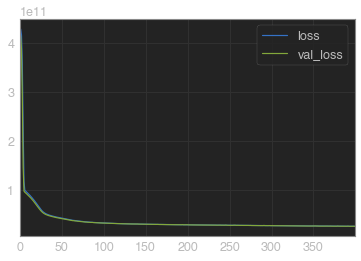

In [65]:
losses.plot()
# We see that there are only incremental improvements in loss;
# however, since the loss of the validation data is continuing to decrease, we know that the model is not overfitting

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [70]:
predictions = model.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test, predictions))

161207.39784005136

In [72]:
explained_variance_score(y_test,predictions)

0.8044678694773177

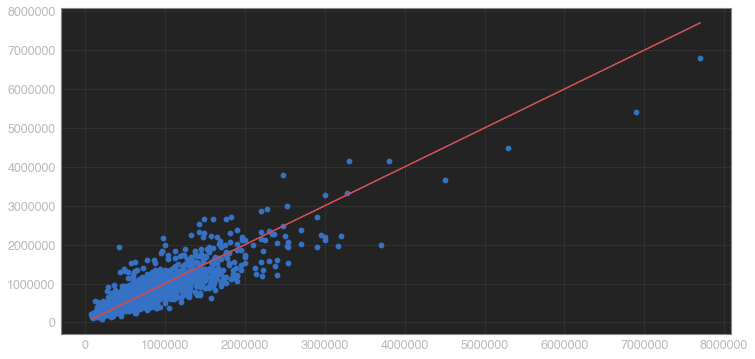

In [75]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [79]:
# Becasuse the model is only able to accurately predict the values of the houses with the outliers omitted, the below will create a new model that will predict the price of a single home
single_house = df.drop('price', axis=1).iloc[0]

In [80]:
single_house = scaler.transform(single_house.values.reshape(-1,19))
model.predict(single_house)

array([[282580.7]], dtype=float32)

In [81]:
df.head(1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
